In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
from torchvision import models
from skimage import io, color, transform
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Path to the folders containing real and fake images
original_folder_path = "/content/gdrive/MyDrive/dataset/original-cropped-images"
synthetic_folder_path = "/content/gdrive/MyDrive/dataset/synthetic-cropped-images"

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
def load_and_preprocess_images(folder,half):
    images = []

    count=0
    if half==1:
        for filename in os.listdir(folder)[:20000]:
            img_path = os.path.join(folder, filename)
            img = io.imread(img_path)
            img_gray = color.rgb2gray(img)
            img_resized = transform.resize(img_gray, (64, 64))  # Resize to a consistent size

            # Convert the NumPy array to a PyTorch tensor
            img_tensor = torch.tensor(img_resized, dtype=torch.float32).to(device)
            images.append(img_tensor)

            count+=1
            print(count)
    if half==2:
        for filename in os.listdir(folder)[20000:]:
            img_path = os.path.join(folder, filename)
            img = io.imread(img_path)
            img_gray = color.rgb2gray(img)
            img_resized = transform.resize(img_gray, (64, 64))  # Resize to a consistent size

            # Convert the NumPy array to a PyTorch tensor
            img_tensor = torch.tensor(img_resized, dtype=torch.float32).to(device)
            images.append(img_tensor)

            count+=1
            print(count)

    return images

In [ ]:
real_images1 = load_and_preprocess_images(original_folder_path,1)

Streaming output truncated to the last 5000 lines.
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
1

In [ ]:
real_images2 = load_and_preprocess_images(original_folder_path,2)

Streaming output truncated to the last 5000 lines.
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
1

In [ ]:
fake_images1 = load_and_preprocess_images(synthetic_folder_path,1)

Streaming output truncated to the last 5000 lines.
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
1

In [ ]:
fake_images2 = load_and_preprocess_images(synthetic_folder_path,2)

Streaming output truncated to the last 5000 lines.
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
1

In [ ]:
# Create labels (0 for real, 1 for fake)
real_labels_tensor = torch.zeros(len(real_images1)+len(real_images2), dtype=torch.float32).to(device)
fake_labels_tensor = torch.ones(len(fake_images1)+len(fake_images2), dtype=torch.float32).to(device)

In [ ]:
real_images_tensor1 = torch.stack(real_images1)
real_images_tensor2 = torch.stack(real_images2)
fake_images_tensor1 = torch.stack(fake_images1)
fake_images_tensor2 = torch.stack(fake_images2)

In [ ]:
# Combine real and fake data
all_images = torch.cat((real_images_tensor1,real_images_tensor2, fake_images_tensor1,fake_images_tensor2), dim=0)
all_labels = torch.cat((real_labels_tensor, fake_labels_tensor), dim=0)

In [ ]:
all_images_numpy = all_images.cpu().numpy()
all_labels_numpy = all_labels.cpu().numpy()

# Split the dataset into training and testing sets
X_train_numpy, X_test_numpy, y_train_numpy, y_test_numpy = train_test_split(
    all_images_numpy, all_labels_numpy, test_size=0.2, random_state=42
)

In [ ]:
# Convert the NumPy arrays back to PyTorch tensors (and move to GPU if available)
X_train = torch.tensor(X_train_numpy, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test_numpy, dtype=torch.float32).to(device)
train_labels = torch.tensor(y_train_numpy, dtype=torch.float32).to(device)
test_labels = torch.tensor(y_test_numpy, dtype=torch.float32).to(device)

### LBP

In [ ]:
# Parameters for LBP
radius = 1
n_points = 8 * radius

# Extract LBP features using PyTorch and GPU
def extract_lbp_features(images):
    features = []
    for img in images:
        img = img.squeeze(0).cpu().numpy()  # Convert the tensor to NumPy and remove the batch dimension
        lbp_img = local_binary_pattern(img, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp_img.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-8)
        features.append(hist)
    return features

In [ ]:
lbp_train_features = extract_lbp_features(X_train)
lbp_test_features = extract_lbp_features(X_test)
lbp_train_features = torch.tensor(lbp_train_features, dtype=torch.float32).to(device)
lbp_test_features = torch.tensor(lbp_test_features, dtype=torch.float32).to(device)

<ipython-input-34-7fcd889b271f>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  lbp_train_features = torch.tensor(lbp_train_features, dtype=torch.float32).to(device)


### HOG

In [ ]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to extract HOG features from a list of images
def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [ ]:
# Extract HOG features from training and testing data
hog_train_features = extract_hog_features(X_train_numpy)
hog_test_features = extract_hog_features(X_test_numpy)

In [ ]:
# Standardize the HOG features
scaler = StandardScaler()
hog_train_features = scaler.fit_transform(hog_train_features)
hog_test_features = scaler.fit_transform(hog_test_features)

In [ ]:
# Convert HOG features to PyTorch tensors
hog_train_features = torch.tensor(hog_train_features, dtype=torch.float32).to(device)
hog_test_features = torch.tensor(hog_test_features, dtype=torch.float32).to(device)

### SIFT

In [ ]:
import cv2

In [ ]:
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []

    for image in images:
        # Perform SIFT feature extraction on CPU
        image8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        keypoints, descriptors = sift.detectAndCompute(image8bit, None)

        # Move keypoints and descriptors to GPU (if available)
        keypoints = [kp.pt for kp in keypoints]

        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

    return keypoints_list, descriptors_list

In [ ]:
train_keypoints_list, train_descriptors_list = extract_sift_features(X_train_numpy)
test_keypoints_list, test_descriptors_list = extract_sift_features(X_test_numpy)

In [ ]:
def keypoints_to_vectors(keypoints_list, descriptors_list):
    sift_vector_length = 128  # SIFT descriptor length

    features_vectors = []

    for descriptors in descriptors_list:
        if descriptors is None:
            # If no keypoints are detected, add zeros as a placeholder
            features_vectors.append(torch.zeros(sift_vector_length).to(device))
        else:
            # Randomly choose one descriptor from multiple descriptors
            random_idx = np.random.randint(0, descriptors.shape[0])
            features_vectors.append(torch.tensor(descriptors[random_idx], dtype=torch.float32).to(device))

    # Convert the list of vectors to a PyTorch tensor
    features_vectors = torch.stack(features_vectors)

    # Move the tensor to the GPU (if available)
    features_vectors = features_vectors.to(device)

    return features_vectors

In [ ]:
train_fv = keypoints_to_vectors(train_keypoints_list, train_descriptors_list)
test_fv = keypoints_to_vectors(test_keypoints_list, test_descriptors_list)

In [ ]:
# Convert the NumPy arrays back to PyTorch tensors (and move to GPU if available)
sift_train_features = torch.tensor(train_fv, dtype=torch.float32).to(device)
sift_test_features = torch.tensor(test_fv, dtype=torch.float32).to(device)

<ipython-input-50-ec93b42eb590>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sift_train_features = torch.tensor(train_fv, dtype=torch.float32).to(device)
<ipython-input-50-ec93b42eb590>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sift_test_features = torch.tensor(test_fv, dtype=torch.float32).to(device)


### Model

In [ ]:
class LbpModel(nn.Module):
    def __init__(self, input_size):
        super(LbpModel, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input if not already flattened
        x = self.fc1(x)
        return x

In [ ]:
class HogModel(nn.Module):
    def __init__(self, input_size):
        super(HogModel, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        self.fc5 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5)
        )
        self.fc6 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5)
        )
        self.fc7 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input if not already flattened
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.fc6(x)
        x = self.fc7(x)
        return x

In [ ]:
class SiftModel(nn.Module):
    def __init__(self, input_size):
        super(SiftModel, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input if not already flattened
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [ ]:
lbp_model=LbpModel(lbp_train_features.shape[1])
lbp_model.to(device)

hog_model=HogModel(hog_train_features.shape[1])
hog_model.to(device)

sift_model=SiftModel(sift_train_features.shape[1])
sift_model.to(device)

In [ ]:
class CombinedModel(nn.Module):
    def __init__(self,lbp_model,hog_model,sift_model):
        super(CombinedModel,self).__init__()
        self.lbp_model=lbp_model
        self.hog_model=hog_model
        self.sift_model=sift_model
        self.fc1=nn.Sequential(
            nn.Linear(96, 48),
            nn.ReLU(),
            nn.BatchNorm1d(48),
            nn.Dropout(0.5)
        )
        self.fc2=nn.Sequential(
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.BatchNorm1d(24),
            nn.Dropout(0.5)
        )
        self.fc3=nn.Sequential(
            nn.Linear(24, 1),
            nn.Sigmoid()
        )

    def forward(self,lbp_features,hog_features,sift_features):
        lbp_output=self.lbp_model(lbp_features)
        hog_output=self.hog_model(hog_features)
        sift_output=self.sift_model(sift_features)

        combined_output=torch.cat((lbp_output,hog_output,sift_output),dim=1)

        x=self.fc1(combined_output)
        x=self.fc2(x)
        x=self.fc3(x)

        return x

In [ ]:
combined_model=CombinedModel(lbp_model,hog_model,sift_model)
combined_model.to(device)

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(combined_model.parameters(), lr=0.01)  # Adam optimizer with a learning rate of 0.001

In [ ]:
# Define the number of training epochs
num_epochs=250
batch_size=32

In [ ]:
lbp_train_dataset=TensorDataset(lbp_train_features,train_labels)
lbp_train_loader=DataLoader(lbp_train_dataset,batch_size,shuffle=True)
lbp_test_dataset=TensorDataset(lbp_test_features,test_labels)
lbp_test_loader=DataLoader(lbp_test_dataset,batch_size,shuffle=False)

In [ ]:
hog_train_dataset=TensorDataset(hog_train_features,train_labels)
hog_train_loader=DataLoader(hog_train_dataset,batch_size,shuffle=True)
hog_test_dataset=TensorDataset(hog_test_features,test_labels)
hog_test_loader=DataLoader(hog_test_dataset,batch_size,shuffle=False)

In [ ]:
sift_train_dataset=TensorDataset(sift_train_features,train_labels)
sift_train_loader=DataLoader(sift_train_dataset,batch_size,shuffle=True)
sift_test_dataset=TensorDataset(sift_test_features,test_labels)
sift_test_loader=DataLoader(sift_test_dataset,batch_size,shuffle=False)

In [ ]:
# training
for epoch in range(num_epochs):
    combined_model.train()
    total_loss=0.0

    for (lbp_batch_data,lbp_labels),(hog_batch_data,hog_labels),(sift_batch_data,sift_labels) in zip(lbp_train_loader,hog_train_loader,sift_train_loader):
        optimizer.zero_grad()
        lbp_batch_data,hog_batch_data,sift_batch_data=lbp_batch_data.to(device),hog_batch_data.to(device),sift_batch_data.to(device)

        output=combined_model(lbp_batch_data,hog_batch_data,sift_batch_data)
        loss=criterion(output,hog_labels.view(-1,1).float().to(device))
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    avg_train_loss = total_loss / len(lbp_train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}")

Epoch [1/250] - Training Loss: 0.5584
Epoch [2/250] - Training Loss: 0.5059
Epoch [3/250] - Training Loss: 0.4863
Epoch [4/250] - Training Loss: 0.4718
Epoch [5/250] - Training Loss: 0.4583
Epoch [6/250] - Training Loss: 0.4470
Epoch [7/250] - Training Loss: 0.4334
Epoch [8/250] - Training Loss: 0.4207
Epoch [9/250] - Training Loss: 0.4143
Epoch [10/250] - Training Loss: 0.4004
Epoch [11/250] - Training Loss: 0.3874
Epoch [12/250] - Training Loss: 0.3780
Epoch [13/250] - Training Loss: 0.3699
Epoch [14/250] - Training Loss: 0.3552
Epoch [15/250] - Training Loss: 0.3473
Epoch [16/250] - Training Loss: 0.3357
Epoch [17/250] - Training Loss: 0.3228
Epoch [18/250] - Training Loss: 0.3121
Epoch [19/250] - Training Loss: 0.3049
Epoch [20/250] - Training Loss: 0.2901
Epoch [21/250] - Training Loss: 0.2846
Epoch [22/250] - Training Loss: 0.2736
Epoch [23/250] - Training Loss: 0.2694
Epoch [24/250] - Training Loss: 0.2620
Epoch [25/250] - Training Loss: 0.2542
Epoch [26/250] - Training Loss: 0.

In [ ]:
# testing
combined_model.eval()

correct = 0
total = 0

with torch.no_grad():
    for (lbp_batch_data,lbp_labels),(hog_batch_data,hog_labels),(sift_batch_data,sift_labels) in zip(lbp_test_loader,hog_test_loader,sift_test_loader):
        lbp_batch_data,hog_batch_data,sift_batch_data=lbp_batch_data.to(device),hog_batch_data.to(device),sift_batch_data.to(device)
        output=combined_model(lbp_batch_data,hog_batch_data,sift_batch_data)

        predicted = (output>=0.5).float()
        total+=hog_labels.size(0)

        for i in range(hog_labels.size(0)):
            if predicted[i][0]==hog_labels[i]:
                correct += 1

accuracy=correct/total
print(f"Test Accuracy: {accuracy:.4f}%")

Test Accuracy: 95.56%


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
num_parameters = count_parameters(combined_model)
print(f"Number of parameters in the model: {num_parameters}")

Number of parameters in the model: 6504017


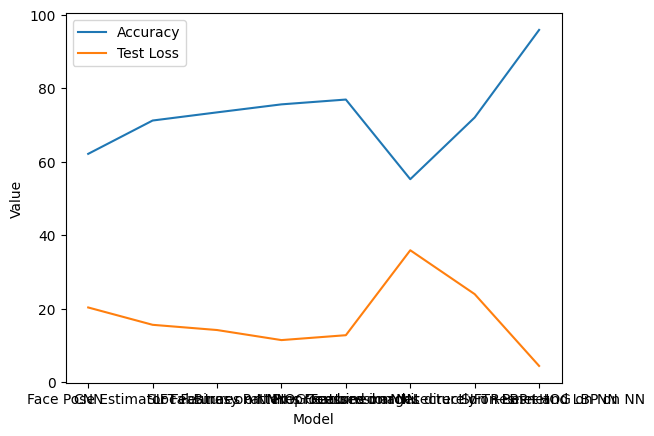

In [1]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracy and test loss values
models = ["CNN", "Face Pose Estimator Features on NN", "SIFT Features on NN", "Local Binary Patterns Features on NN", "HOG Features on NN", "Preprocessed images directly on Resnet", "Combined architecture on Resnet and LBP on NN", "SIFT+LBP+HOG on NN"]
accuracy = [62.16, 71.23, 73.45, 75.63, 76.94, 55.26, 72.06, 95.89]
test_loss = [20.35, 15.63, 14.21, 11.47, 12.80, 35.92, 23.98, 4.44]

# Plot the accuracy and test loss of each model
plt.plot(models, accuracy, label='Accuracy')
plt.plot(models, test_loss, label='Test Loss')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend()
plt.show()


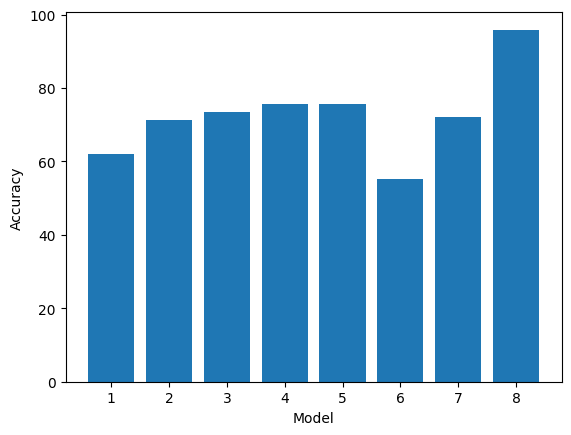

In [10]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracy values
# models = ["CNN", "Face Pose Estimator Features on NN", "SIFT Features on NN", "Local Binary Patterns Features on NN", "HOG Features on NN", "Preprocessed images directly on Resnet", "Combined architecture on Resnet and LBP on NN", "SIFT+LBP+HOG on NN"]
accuracy = [62.16, 71.23, 73.45, 75.63, 75.63, 55.2, 72.06, 95.89]
models = [1, 2, 3, 4, 5, 6, 7, 8]

model = ["CNN", "Face Pose Estimator on NN", "SIFT on NN", "LBP on NN","HOG on NN", "Preprocessed images directly on Resnet", "Resnet and LBP on NN", "SIFT + LBP + HOG on NN"]

# Plot the bar graph
plt.bar(models, accuracy, label=model)

# Add axis labels and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
# plt.legend()

# Show the graph
plt.show()


# Plot the bar graph
# plt.bar(models, accuracy)

# # Add axis labels and legend
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.legend()

# # Show the graph
# plt.show()


